<a href="https://colab.research.google.com/github/shailymishra/Machine-Learning-Concepts/blob/master/2_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-nearest 
1) What is K-nearest neighbors? 

8) Pseudocode

2) What should be the value of k? what happens when k is too less or too large? what happens with a tie, i.e. two points with same distance?


3) How does distance functions affect? when to chose to which norm? distance is equivalent to similarity, so for example in case of cricketers problems how do you calculate similarity between them?  - weighted distance functions? cosine similarity?

3) problems with practical implementation? can we decrease the complexity?

5)Any practical application using k-nearest? 
Thoughts:

6)Benefits/Drawbacks

7) What are the practical issues in implementing this
algorithm for spam filters on gmail? 


9) Classification / Regression

10) Multiclass classification using KNN? what should be the value of K

11) Ways to make the computation faster => calculating distance can be done as matrix operation instead of loop. (algorithm variations)

12)  time complexity of this algorithm


In [ ]:
## first is self implementation and then at the last of the notebook there's python lib implementation
## and the answer to the following question is at the end
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
## F(v) = (v - mean) / std
def preprocessing(data):
    max = np.max(data[:,:-1])
    data[:,:-1] = data[:,:-1]/max
    return 

def load_data():
  iris = datasets.load_iris()
  X = iris.data
  y = iris.target
  X_train, X_test, y_train, y_test = train_test_split(X, y)

  print(f'X_train shape: {X_train.shape}')
  print(f'y_train shape: {y_train.shape}')
  print(f'X_test shape: {X_test.shape}')
  print(f'y_test shape: {y_test.shape}')
  return X_train,y_train,X_test,y_test

In [ ]:
#### Distance Functions
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))



### Define any distance function according to need
def distancefunction(x1,x2,distancemetric='euclidean'):
   return globals()[distancemetric](x1,x2)


In [ ]:
class KNN:

    def __init__(self, K=3, distancemetric = 'euclidean'):
        """
        Intialize the value of K and distancemetric
        """
        self.K = K
        self.distancemetric = distancemetric

    def train(self, X, y):
      """
      In KNN, as it is lazy learning, in training => we just memorize the training data.
      Inputs:
      - X: (nxd) - numpy array containing the training data; n is the number of samples and d is the dim
      - y: (nx,) - numpy array containing the label of training data
      """
      self.X_train = X
      self.y_train = y


    def predict(self, X_test):
        """
        Returns the prediction of X_test

        Input: X_test (n x d) => numpy array of nxd dimension
        Output: y_test (nx,) => numpay array of n dimension
        This method first calculate the distance of a datapoint with all the training points, sorts it, and then select the datapoint of top K distance
        """
        predictions = [] 
        for i in range(len(X_test)):
            # Find distance of a test datapoint with all the training samples
            dist = np.array([distancefunction(X_test[i], X_train_sample) for X_train_sample in  self.X_train])
            # Using argsort to sort the distance and return the idx of those training samples. and then pick the top K
            nearest_k_samples= dist.argsort()[:self.K]
            neigh_labels = self.y_train[nearest_k_samples]
            uniquelabels, labelcount = np.unique(neigh_labels, return_counts=True)

            predictions.append(uniquelabels[np.argmax(labelcount)])
        return np.array(predictions)

In [ ]:
### Performance metric
def calculate_accuracy(y_true,y_pred):
  return np.sum(y_pred == y_true)/len(y_pred) * 100

def calculate_error(y_true,y_pred):
  return np.mean(y_pred != y_true)




X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Text(0, 0.5, 'Mean Error')

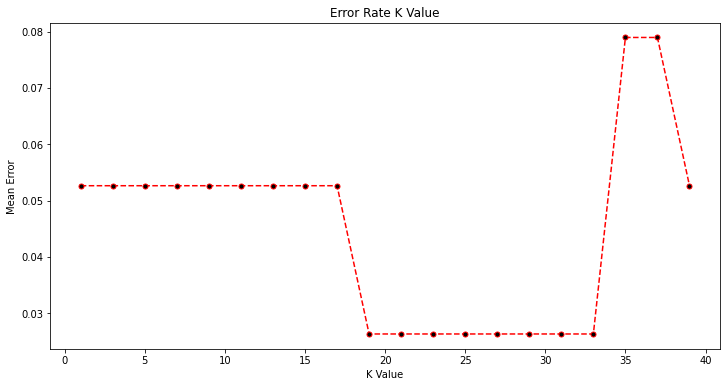

In [ ]:
#### KNN Classifier Testing
### Load the data
X_train,y_train,X_test,y_test  = load_data()

error = []
for i in range(1, 40,2):
    knn = KNN(K=i)
    knn.train(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
######## Optimal K ###############
#################################
### Call the classifier
classifier = KNN(23)
# ### Train, i.e. memorizing training samples
classifier.train(X_train, y_train)
# ### Predict the test samples
y_test_pred = classifier.predict(X_test)

print(f"Test accuracy with k = 23: {format(calculate_accuracy(y_test,y_test_pred))}")



Test accuracy with k = 11: 97.36842105263158


[[11  0  0]
 [ 0 13  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



Text(0, 0.5, 'Mean Error')

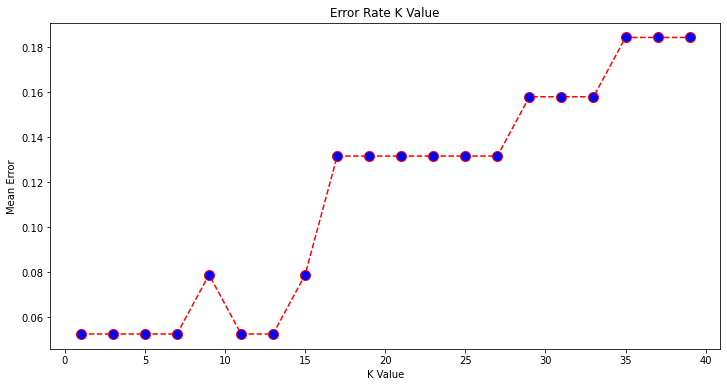

In [ ]:
################################################################################
# KNN using Python Inbuilt  Function                                           #
# 1. Preprocessing data                                                        #
# 2. Call classifier, fit, test                                                #
# 3. plot error/accuracy to find optimal K                                     #
################################################################################


### Preprocessing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Performance metric
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []

for i in range(1, 40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Answers from various sources

1) K-Nearest Neighbour is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. K-Nearest Neighbours can be used for both classification and regression. 

- NEAREST NEIGHBOURS (LAZY LEARNERS)
	- say there is a point q, and if it is near to apple points then its is apple. else it is a orange. 
	- why lazy learners, because you give point and then it commutes all distance to other points, and then sorts them, and then decides. so its lazy, it works only when given point
	- No offline work
	- Non parametric algorithm (doesn't have training time, but inference time is much higher)

2) Pseudocode
- Load the data
- Initialize the value of k
- Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
- Sort the calculated distances in ascending order based on distance values
- Get top k rows from the sorted array
- Get the most frequent class of these rows
- Return the predicted class

2) What should be the value of k? what happens when k is too less or too large? what happens with a tie, i.e. two points with same distance?
- ideally we plot the error vs K (using K-Fold technique) to find the optimal K. 
- K value should be odd => to avoid ties. and K value should not be equal to the number of class. 
- if K is too less, (k=1), training error is zero. as we take distance of all points from training datasets, and k=1 means zero training error. so the model is overfitting.
  - overfitting
  - sensitive to noise
  - overfitting can never generalize
- If k is too high, the training error is more. and so it is underfitting. 
  - underfitting (high bias)
  - if we have 10000 samples of classA and just 1000 class of classB, so if k is too high, then chances are it will class it as ClassA. Highly biased.


3) How does distance functions affect? when to chose to which norm? distance is equivalent to similarity, so for example in case of cricketers problems how do you calculate similarity between them?  - weighted distance functions? cosine similarity?

- In the distance-weighted KNN, you’re basically emphasizing more on the values closer to your test value and less on the values that are far away and similarly assigning the weightage to each of them.
- Since we’ve given equal weightage to all our features in the traditional KNN, let’s try to assign different weightage to each of them in this variation. The important features would have a greater weightage while the less important ones would have a lower weightage and the least important ones would have weightage as 0 or close to 0.

Ways to measure distances
- Minkowski distance
- Manhattan distance
- Euclidean distance
- Hamming distance
- Cosine distance

3) problems with practical implementation? can we decrease the complexity?

- . KNN works on low dimension dataset while faces problems when dealing with high dimensional data.
- time and space complexity

5)Any practical application using k-nearest? 
Thoughts:
- KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

- KNN can be used for Recommendation Systems. Although in the real world, more sophisticated algorithms are used for the recommendation system. KNN is not suitable for high dimensional data, but KNN is an excellent baseline approach for the systems. Many companies make a personalized recommendation for its consumers, such as Netflix, Amazon, YouTube, and many more.
KNN can search for semantically similar documents. Each document is considered as a vector. If documents are close to each other, that means the documents contain identical topics.
KNN can be effectively used in detecting outliers. One such example is Credit Card fraud detection.

- The KNN algorithm have been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision, particularly face recognition tasks.

6)Benefits/Drawbacks

Pros

It is extremely easy to implement
As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
Since the algorithm requires no training before making predictions, new data can be added seamlessly.
There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)



Cons

The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

7) What are the practical issues in implementing this
algorithm for spam filters on gmail? 
- Always spam will be more than not spam. data bias?
- . KNN works on low dimension dataset while faces problems when dealing with high dimensional data.
- personalized spam filter/recommeder?

9) Classification / Regression
Regression => value will be average of the neighbours

10) Multiclass classification using KNN? what should be the value of K

11) Ways to make the computation faster => calculating distance can be done as matrix operation instead of loop. (algorithm variations)

12)  time complexity of this algorithm
For the brute-force neighbor search of the kNN algorithm, we have a time complexity of
O(n×m), where n is the number of training examples and m is the number of dimensions in
the training set. For simplicity, assuming n >> m, the complexity of the brute-force nearest
neighbor search is O(n).
(https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/02_knn_notes.pdf)


https://stats.stackexchange.com/questions/219655/k-nn-computational-complexity
First, let's consider a O(nd+kn) runtime algorithm:
Initialize selectedi=0 for all observations i in the training set
For each training set observation i, compute disti, the distance from the new observation to training set observation i
For j=1 to k: Loop through all training set observations, selecting the index i with the smallest disti value and for which selectedi=0. Select this observation by setting selectedi=1.
Return the k selected indices
Each distance computation requires O(d) runtime, so the second step requires O(nd) runtime. For each iterate in the third step, we perform O(n) work by looping through the training set observations, so the step overall requires O(nk) work. The first and fourth steps only require O(n) work, so we get a O(nd+kn) runtime.

13) beyond brute force knn
- k-D trees
- inverted lists
- locally sensing hashing